## Import the data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install dataprep

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving restaurant_revenue_dataset.csv to restaurant_revenue_dataset (1).csv


In [ ]:
df= pd.read_csv('/content/restaurant_revenue_dataset.csv')

## Exploring the data

In [ ]:
df

location cuisine_type  average_customer_spending  promotions  reviews  \
0       Urban      Mexican                  36.715202           0        5   
1    Downtown      Mexican                  17.959694           0        2   
2       Urban      Mexican                  18.139435           0        5   
3       Urban      Mexican                  30.427652           0        1   
4    Downtown      Italian                  25.059911           0        4   
..        ...          ...                        ...         ...      ...   
995    Suburb      Italian                  15.291710           0        4   
996    Suburb      Mexican                  31.502960           0        5   
997     Urban        Asian                  22.798427           0        5   
998     Urban      Mexican                   5.226720           1        1   
999  Downtown      Mexican                  22.577609           0        2   

     monthly_revenue  
0        5175.286779  
1        3663.274561  
2        4588.176631  
3        5131.927967  
4        4545.452281  
..               ...  
995      5662.051835  
996      6188.596823  
997      6849.362141  
998      5843.105332  
999      6162.838578  

[1000 rows x 6 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location                   1000 non-null   object 
 1   cuisine_type               1000 non-null   object 
 2   average_customer_spending  1000 non-null   float64
 3   promotions                 1000 non-null   int64  
 4   reviews                    1000 non-null   int64  
 5   monthly_revenue            1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


In [ ]:
df.isna().sum()

location                     0
cuisine_type                 0
average_customer_spending    0
promotions                   0
reviews                      0
monthly_revenue              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes.value_counts()

object     2
float64    2
int64      2
dtype: int64

In [ ]:
df.nunique()

location                        3
cuisine_type                    3
average_customer_spending    1000
promotions                      2
reviews                         5
monthly_revenue              1000
dtype: int64

In [ ]:
df.columns

Index(['location', 'cuisine_type', 'average_customer_spending', 'promotions',
       'reviews', 'monthly_revenue'],
      dtype='object')

In [ ]:
print(df.location.value_counts())

Downtown    355
Suburb      326
Urban       319
Name: location, dtype: int64


In [ ]:
print(df.cuisine_type.value_counts())

Italian    334
Mexican    333
Asian      333
Name: cuisine_type, dtype: int64


In [ ]:
print(df.promotions.value_counts())

0    791
1    209
Name: promotions, dtype: int64


In [ ]:
print(df.reviews.value_counts())

4    216
5    205
3    204
2    194
1    181
Name: reviews, dtype: int64


## Data Visualization


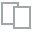
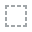
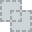
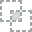
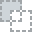
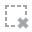
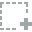
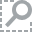
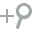
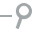
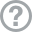
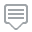
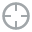
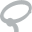
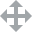
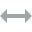
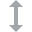
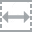
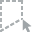
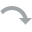
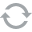
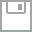
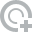
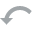
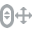
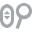
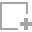
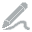
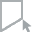
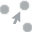
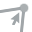
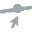

In [ ]:
from dataprep.eda import plot
plot(df)

<ipython-input-58-5a9f59d1f1be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='BrBG')


<Axes: >

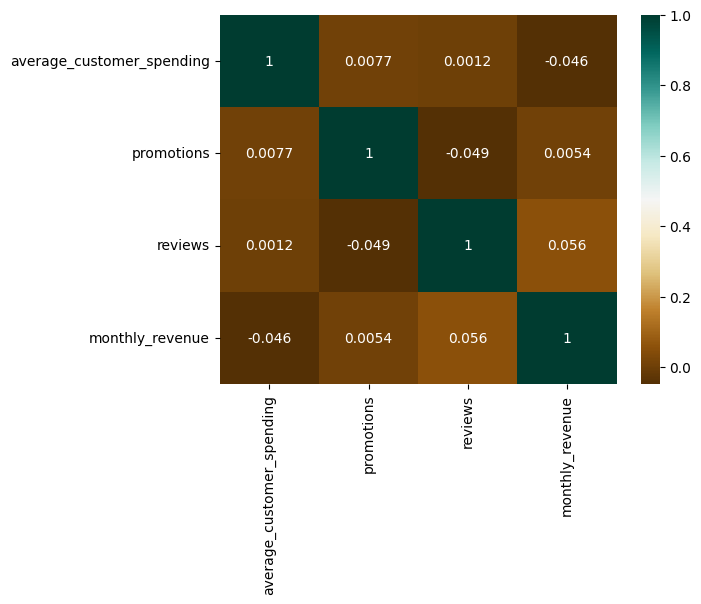

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

<ipython-input-60-1a3677936a7b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['monthly_revenue'],hist=False)


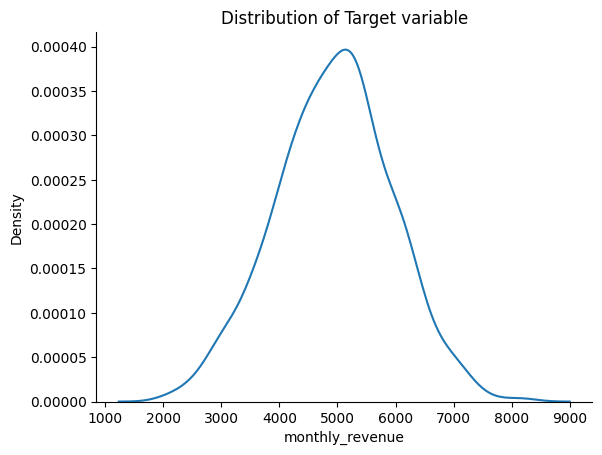

In [ ]:
sns.distplot(df['monthly_revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine()

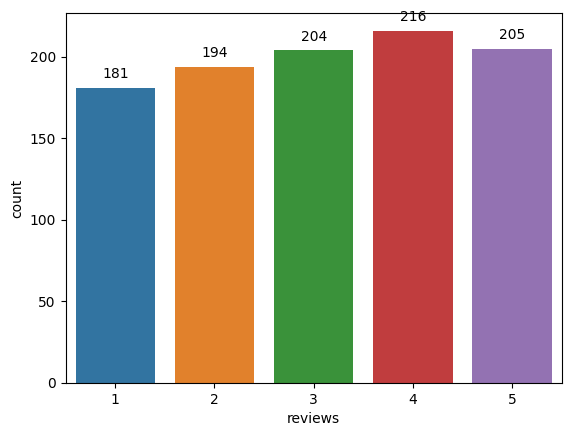

In [ ]:
# Create a countplot with labels
ax = sns.countplot(x='reviews', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
df['cuisine_type'] = label_encoder.fit_transform(df['cuisine_type'])
df['reviews'] = label_encoder.fit_transform(df['reviews'])

In [ ]:
df

location  cuisine_type  average_customer_spending  promotions  reviews  \
0           2             2                  36.715202           0        4   
1           0             2                  17.959694           0        1   
2           2             2                  18.139435           0        4   
3           2             2                  30.427652           0        0   
4           0             1                  25.059911           0        3   
..        ...           ...                        ...         ...      ...   
995         1             1                  15.291710           0        3   
996         1             2                  31.502960           0        4   
997         2             0                  22.798427           0        4   
998         2             2                   5.226720           1        0   
999         0             2                  22.577609           0        1   

     monthly_revenue  
0        5175.286779  
1        3663.274561  
2        4588.176631  
3        5131.927967  
4        4545.452281  
..               ...  
995      5662.051835  
996      6188.596823  
997      6849.362141  
998      5843.105332  
999      6162.838578  

[1000 rows x 6 columns]

## Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['monthly_revenue'], axis=1)
y = df['monthly_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

location  cuisine_type  average_customer_spending  promotions  reviews
0           2             2                  36.715202           0        4
1           0             2                  17.959694           0        1
2           2             2                  18.139435           0        4
3           2             2                  30.427652           0        0
4           0             1                  25.059911           0        3
..        ...           ...                        ...         ...      ...
995         1             1                  15.291710           0        3
996         1             2                  31.502960           0        4
997         2             0                  22.798427           0        4
998         2             2                   5.226720           1        0
999         0             2                  22.577609           0        1

[1000 rows x 5 columns]

In [ ]:
y

0      5175.286779
1      3663.274561
2      4588.176631
3      5131.927967
4      4545.452281
          ...     
995    5662.051835
996    6188.596823
997    6849.362141
998    5843.105332
999    6162.838578
Name: monthly_revenue, Length: 1000, dtype: float64

 XGB Regression

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score


# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1559117.0000433116
Root Mean Squared Error (RMSE): 1248.6460667632407
R-squared (R2): -0.471290517155851
Mean Absolute Error (MAE): 976.3330422187023


Random Forest Regressor with permutation importance

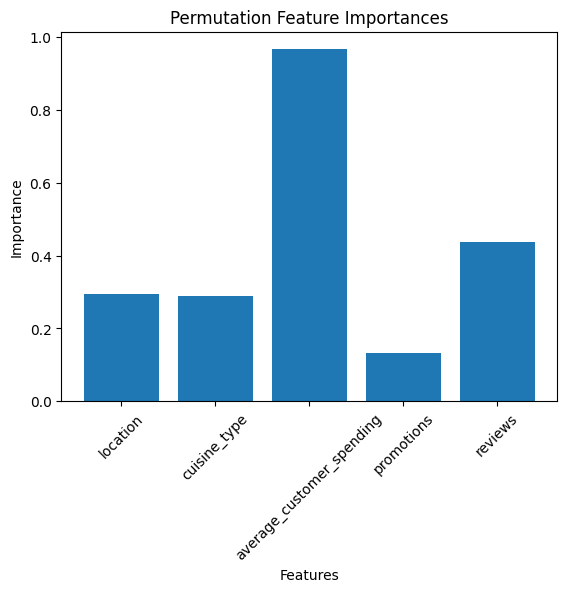

Mean Squared Error (MSE): 167234.069949145
Root Mean Squared Error (RMSE): 408.9426242752704
R-squared (R2): 0.8421863777672105
Mean Absolute Error (MAE): 320.5490452121804


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
# Train a random forest model
model_1 = RandomForestRegressor()
model_1.fit(X, y)

# Calculate permutation importance
results = permutation_importance(model_1, X, y, n_repeats=10, random_state=42)

# Get feature importances
importances = results.importances_mean

# Plot the feature importances
plt.bar(X.columns, importances)
plt.title("Permutation Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Make predictions and evaluate the model
y_pred = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)
r_squared_1 = r2_score(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_1)
print("Root Mean Squared Error (RMSE):", rmse_1)
print("R-squared (R2):", r_squared_1)
print("Mean Absolute Error (MAE):", mae_1)

Linear Regression with Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the preprocessing steps for numerical and categorical features
numeric_features = ['reviews']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['location', 'cuisine_type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Train a linear regression model
model_2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])
model_2.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred)
# Make predictions and evaluate the model
rmse_2 = np.sqrt(mse_2)
r_squared_2 = r2_score(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_2)
print("Root Mean Squared Error (RMSE):", rmse_2)
print("R-squared (R2):", r_squared_2)
print("Mean Absolute Error (MAE):", mae_2)

Mean Squared Error (MSE): 1073531.3146679571
Root Mean Squared Error (RMSE): 1036.113562631026
R-squared (R2): -0.013058316404055637
Mean Absolute Error (MAE): 833.1841364016637


Linear Regression

In [ ]:
from sklearn.feature_selection import RFE
# Train a linear regression model
model_3 = LinearRegression()
model_3.fit(X, y)

# Perform feature selection using RFE
rfe = RFE(model_3, n_features_to_select=3)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features)

# Make predictions and evaluate the model
y_pred = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred)
# Make predictions and evaluate the model
rmse_3 = np.sqrt(mse_3)
r_squared_3 = r2_score(y_test, y_pred)
mae_3 = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_3)
print("Root Mean Squared Error (RMSE):", rmse_3)
print("R-squared (R2):", r_squared_3)
print("Mean Absolute Error (MAE):", mae_3)


Index(['location', 'promotions', 'reviews'], dtype='object')
Mean Squared Error (MSE): 1048967.6691849497
Root Mean Squared Error (RMSE): 1024.1912268638848
R-squared (R2): 0.010121636521172706
Mean Absolute Error (MAE): 820.4954311222311


 Dummy Regressor

In [ ]:
#baseline model
from sklearn.dummy import DummyRegressor

# Create a DummyRegressor as a baseline model (predicts the mean of the target variable)
baseline_model = DummyRegressor(strategy='mean')

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
baseline_predictions = baseline_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the model
baseline_mse = mean_squared_error(y_test, baseline_predictions)

# Calculate evaluation metrics
rmse_4 = np.sqrt(baseline_mse)
r_squared_4 = r2_score(y_test, baseline_predictions)
mae_4 = mean_absolute_error(y_test, baseline_predictions)

# Print the evaluation metrics
print(f"Baseline Mean Squared Error: {baseline_mse}")
print("Root Mean Squared Error (RMSE):", rmse_4)
print("R-squared (R2):", r_squared_4)
print("Mean Absolute Error (MAE):", mae_4)

Baseline Mean Squared Error: 1061750.2326178583
Root Mean Squared Error (RMSE): 1030.4126516196598
R-squared (R2): -0.001940873452908276
Mean Absolute Error (MAE): 826.1709339033125


 Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn import metrics
# loading the linear regression model
model_5 = Lasso()
model_5.fit(X_train,y_train)
#Model Evaluation
model_5_prediction = model_5.predict(X_test)
# Calculate the Mean Squared Error (MSE) for the model
mse_5 = mean_squared_error(y_test, model_5_prediction)

# Calculate evaluation metrics
rmse_5 = np.sqrt(mse_5)
r_squared_5 = r2_score(y_test, model_5_prediction)
mae_5 = mean_absolute_error(y_test, model_5_prediction)

# Print the evaluation metrics
print(f"Baseline Mean Squared Error: {mse_5}")
print("Root Mean Squared Error (RMSE):", rmse_5)
print("R-squared (R2):", r_squared_5)
print("Mean Absolute Error (MAE):", mae_5)

Baseline Mean Squared Error: 1059768.2124443408
Root Mean Squared Error (RMSE): 1029.450441956455
R-squared (R2): -7.050228382543544e-05
Mean Absolute Error (MAE): 824.6172253009394


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
res = pd.DataFrame()

tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
#Model Evaluation
tree_prediction = tree.predict(X_test)
# Calculate the Mean Squared Error (MSE) for the model
mse_6 = mean_squared_error(y_test, tree_prediction)

# Calculate evaluation metrics
rmse_6 = np.sqrt(mse_6)
r_squared_6 = r2_score(y_test, tree_prediction)
mae_6 = mean_absolute_error(y_test, tree_prediction)

# Print the evaluation metrics
print(f" Mean Squared Error: {mse_6}")
print("Root Mean Squared Error (RMSE):", rmse_6)
print("R-squared (R2):", r_squared_6)
print("Mean Absolute Error (MAE):", mae_6)

 Mean Squared Error: 2118350.8964399076
Root Mean Squared Error (RMSE): 1455.4555631965916
R-squared (R2): -0.9990222580178723
Mean Absolute Error (MAE): 1129.6357215242303


Random Forest

In [ ]:
rf.fit(X_train,y_train)
#Model Evaluation
rf_prediction = rf.predict(X_test)
# Calculate the Mean Squared Error (MSE) for the model
mse_7 = mean_squared_error(y_test, rf_prediction)

# Calculate evaluation metrics
rmse_7 = np.sqrt(mse_6)
r_squared_7 = r2_score(y_test, rf_prediction)
mae_7 = mean_absolute_error(y_test, rf_prediction)

# Print the evaluation metrics
print(f" Mean Squared Error: {mse_7}")
print("Root Mean Squared Error (RMSE):", rmse_7)
print("R-squared (R2):", r_squared_7)
print("Mean Absolute Error (MAE):", mae_7)

 Mean Squared Error: 1335038.5329788825
Root Mean Squared Error (RMSE): 1455.4555631965916
R-squared (R2): -0.25983459455250824
Mean Absolute Error (MAE): 904.7553936640635


 Gradient Boost

In [ ]:
gb.fit(X_train,y_train)
#Model Evaluation
gb_prediction = gb.predict(X_test)
# Calculate the Mean Squared Error (MSE) for the model
mse_8 = mean_squared_error(y_test, gb_prediction)

# Calculate evaluation metrics
rmse_8 = np.sqrt(mse_8)
r_squared_8 = r2_score(y_test, gb_prediction)
mae_8 = mean_absolute_error(y_test, gb_prediction)

# Print the evaluation metrics
print(f" Mean Squared Error: {mse_8}")
print("Root Mean Squared Error (RMSE):", rmse_8)
print("R-squared (R2):", r_squared_8)
print("Mean Absolute Error (MAE):", mae_8)

 Mean Squared Error: 1211803.475089084
Root Mean Squared Error (RMSE): 1100.8194561730293
R-squared (R2): -0.14354147989249477
Mean Absolute Error (MAE): 891.1711378798958


XGboost

In [ ]:
xgb.fit(X_train,y_train)
#Model Evaluation
xgb_prediction = xgb.predict(X_test)
# Calculate the Mean Squared Error (MSE) for the model
mse_9 = mean_squared_error(y_test, xgb_prediction)

# Calculate evaluation metrics
rmse_9 = np.sqrt(mse_9)
r_squared_9 = r2_score(y_test, xgb_prediction)
mae_9 = mean_absolute_error(y_test, xgb_prediction)

# Print the evaluation metrics
print(f" Mean Squared Error: {mse_9}")
print("Root Mean Squared Error (RMSE):", rmse_9)
print("R-squared (R2):", r_squared_9)
print("Mean Absolute Error (MAE):", mae_9)

 Mean Squared Error: 1559117.0000433116
Root Mean Squared Error (RMSE): 1248.6460667632407
R-squared (R2): -0.471290517155851
Mean Absolute Error (MAE): 976.3330422187023


## Model Comparison

In [ ]:
# Assuming you have the model names and their respective evaluation metrics
model_names = ['XGb_reg','Randomforest', 'pipelineLR', 'LinearRegression', 'baseline_model','LassoRegression','Decision Tree', 'RandomForestReg', 'Gradient Boosting', 'XGBoost']
mse_values = [mse, mse_1, mse_2, mse_3, baseline_mse, mse_5, mse_6, mse_7, mse_8, mse_9]  # Replace with actual MSE values
rmse_values = [rmse, rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9]  # Replace with actual RMSE values
r2_values = [r_squared, r_squared_1, r_squared_2, r_squared_3, r_squared_4, r_squared_5, r_squared_6, r_squared_7, r_squared_8, r_squared_9]  # Replace with actual R-squared values
mae_values = [mae, mae_1, mae_2, mae_3, mae_4, mae_5, mae_6, mae_7, mae_8, mae_9]  # Replace with actual MAE values

# Create a DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R-squared': r2_values

})

# Display the DataFrame
print(df)


               Model           MSE         RMSE          MAE  R-squared
0            XGb_reg  1.559117e+06  1248.646067   976.333042  -0.471291
1       Randomforest  1.672341e+05   408.942624   320.549045   0.842186
2         pipelineLR  1.073531e+06  1036.113563   833.184136  -0.013058
3   LinearRegression  1.048968e+06  1024.191227   820.495431   0.010122
4     baseline_model  1.061750e+06  1030.412652   826.170934  -0.001941
5    LassoRegression  1.059768e+06  1029.450442   824.617225  -0.000071
6      Decision Tree  2.118351e+06  1455.455563  1129.635722  -0.999022
7    RandomForestReg  1.335039e+06  1455.455563   904.755394  -0.259835
8  Gradient Boosting  1.211803e+06  1100.819456   891.171138  -0.143541
9            XGBoost  1.559117e+06  1248.646067   976.333042  -0.471291


The R-squared value should typically be between 0 and 1. Random Forest and Linear Regression are the two models the r-squared values lies between the range.

Baseline_model is a dummy regressor

## GridSearch for randomforest,GradientBoost,XGB

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the models
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

# Fit and evaluate the models using GridSearchCV
models = [rf, gb, xgb]
modl_names = [ 'Random Forest', 'Gradient Boosting', 'XGBoost']
results = []
for i, modl in enumerate(models):
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, 40, 50],
        'random_state': [42]
    }
    grid_search = GridSearchCV(modl, param_grid, cv=10, scoring='r2', refit=True)
    grid_search.fit(X_train, y_train)
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    results.append([model_names[i], best_score, best_params])

# Create a DataFrame for the results
columns = ['Modl', 'R2 score', 'Params']
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df)

                Modl  R2 score  \
0      Random Forest -0.151083   
1  Gradient Boosting -0.524666   
2            XGBoost -0.586739   

                                              Params  
0  {'max_depth': 10, 'n_estimators': 100, 'random...  
1  {'max_depth': 10, 'n_estimators': 100, 'random...  
2  {'max_depth': 30, 'n_estimators': 500, 'random...  


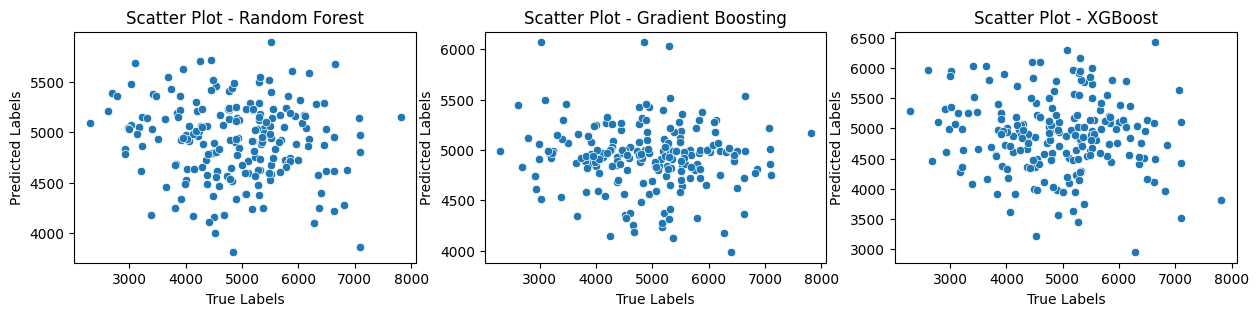

In [ ]:
# Assuming models is a list of regressors
num_plots = 3
fig, axes = plt.subplots(1, num_plots, figsize=(15, 3))  # Adjust the figsize as needed

for i, (model_name, modl) in enumerate(zip(model_names, models)):
    modl.fit(X_train, y_train)
    predictions = modl.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    sns.scatterplot(x=y_test, y=predictions, ax=axes[i])
    axes[i].set_title(f'Scatter Plot - {model_name}')
    axes[i].set_xlabel('True Labels')
    axes[i].set_ylabel('Predicted Labels')

plt.show()

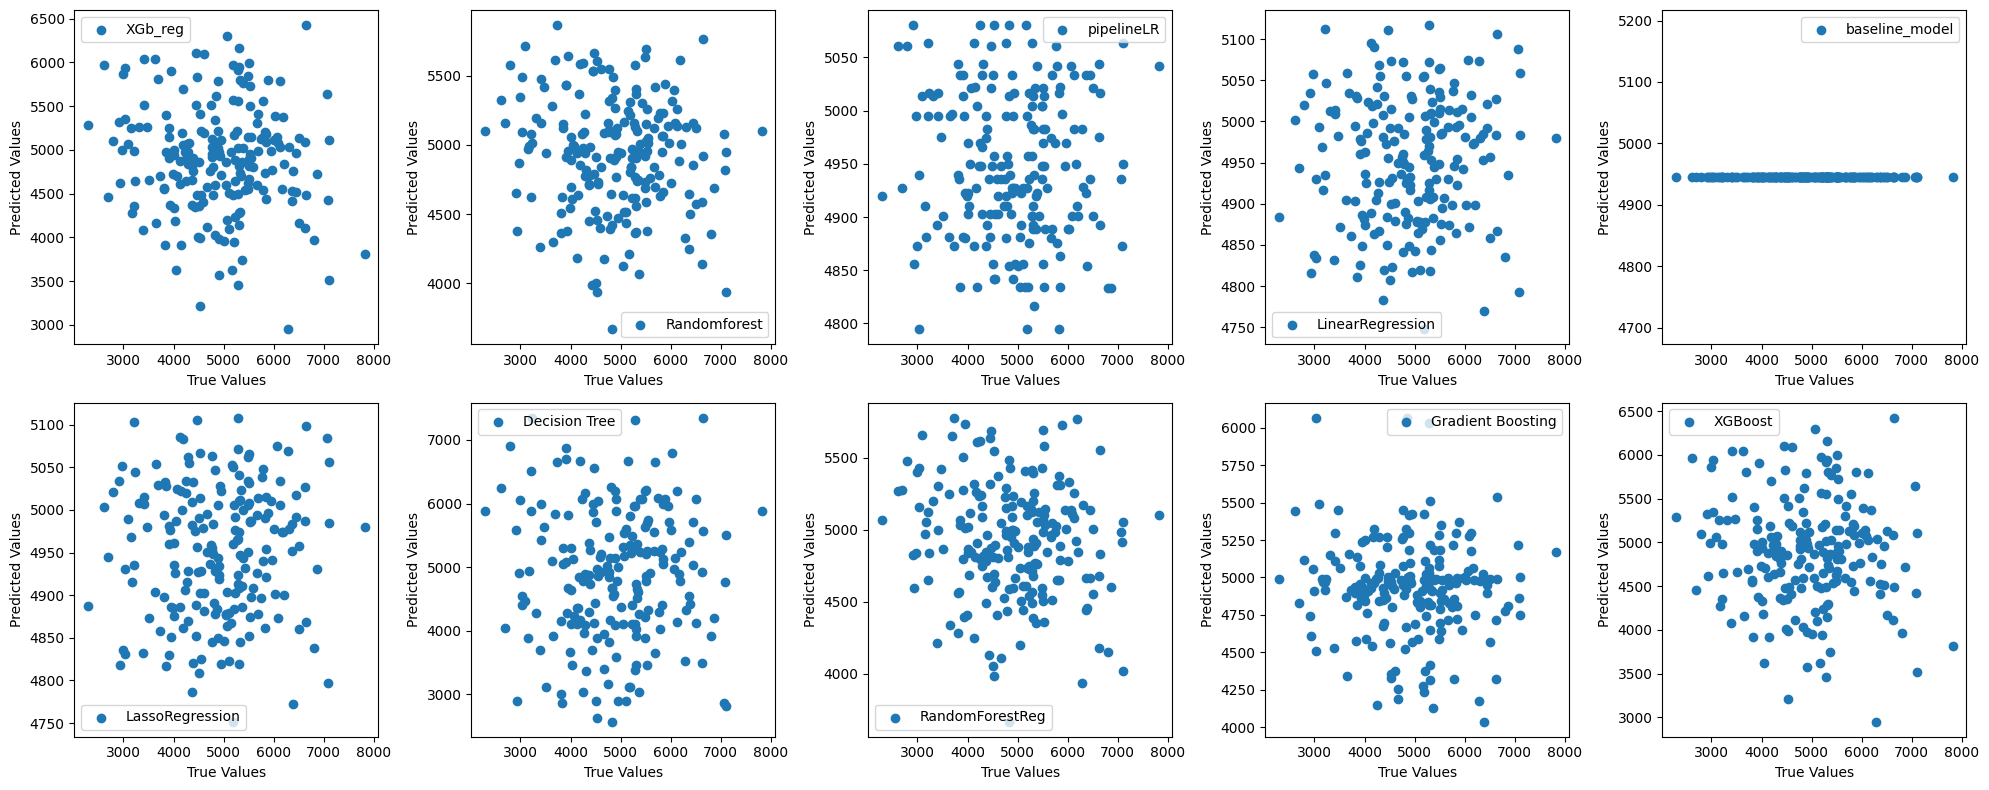

In [ ]:
from sklearn.metrics import confusion_matrix
# Assuming models is a list of regressors
model_names=['XGb_reg','Randomforest', 'pipelineLR', 'LinearRegression', 'baseline_model','LassoRegression','Decision Tree', 'RandomForestReg', 'Gradient Boosting', 'XGBoost']
mdls= [model, model_1, model_2, model_3, baseline_model, model_5, tree, rf, gb, xgb]

true_values = y_test  # Replace with actual true values

# Scatter plot for each model
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))  # Adjust the figsize as needed
for i, (model_name, modl) in enumerate(zip(model_names, mdls)):
    modl.fit(X_train, y_train)
    predicted_values = modl.predict(X_test)
    axes[i//5, i%5].scatter(true_values, predicted_values, label=model_name)
    axes[i//5, i%5].set_xlabel('True Values')
    axes[i//5, i%5].set_ylabel('Predicted Values')
    axes[i//5, i%5].legend()

plt.tight_layout()
plt.show()

XGb_reg: Adjusted R-squared = -0.509, Predicted R-squared = -0.471
Randomforest: Adjusted R-squared = -0.279, Predicted R-squared = -0.247
pipelineLR: Adjusted R-squared = -0.039, Predicted R-squared = -0.013
LinearRegression: Adjusted R-squared = -0.026, Predicted R-squared = -0.000
baseline_model: Adjusted R-squared = -0.028, Predicted R-squared = -0.002
LassoRegression: Adjusted R-squared = -0.026, Predicted R-squared = -0.000
Decision Tree: Adjusted R-squared = -1.071, Predicted R-squared = -1.019
RandomForestReg: Adjusted R-squared = -0.283, Predicted R-squared = -0.250
Gradient Boosting: Adjusted R-squared = -0.176, Predicted R-squared = -0.146
XGBoost: Adjusted R-squared = -0.509, Predicted R-squared = -0.471


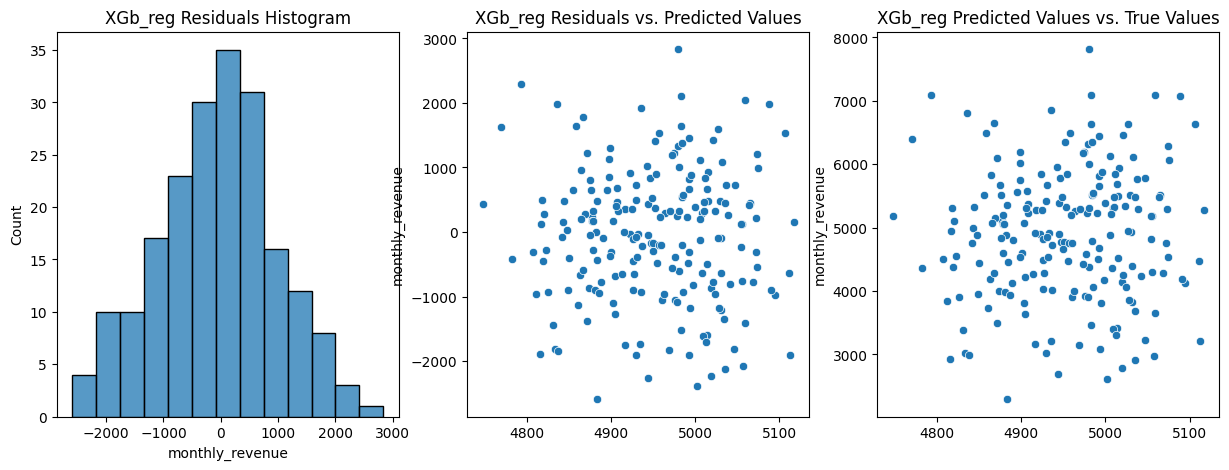

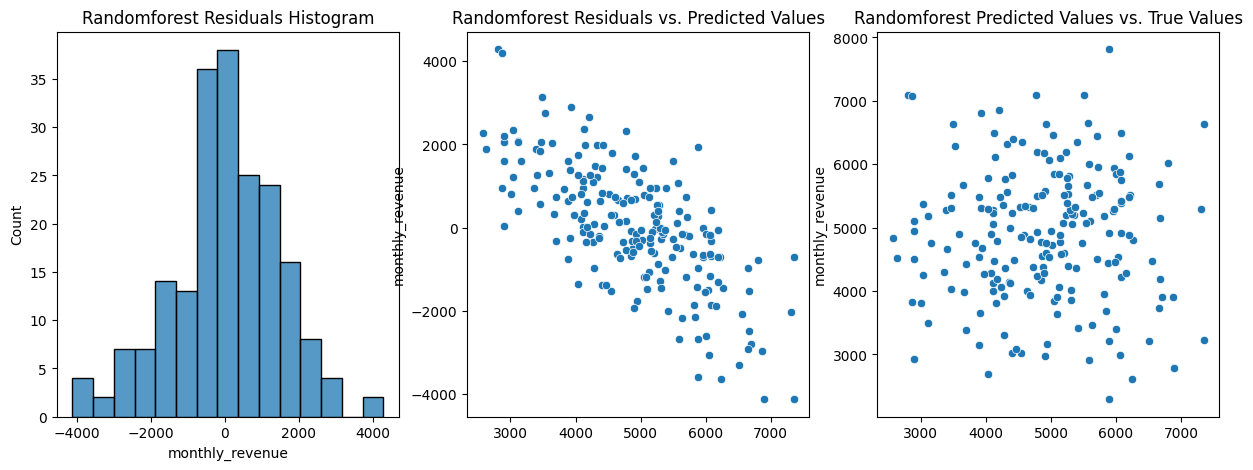

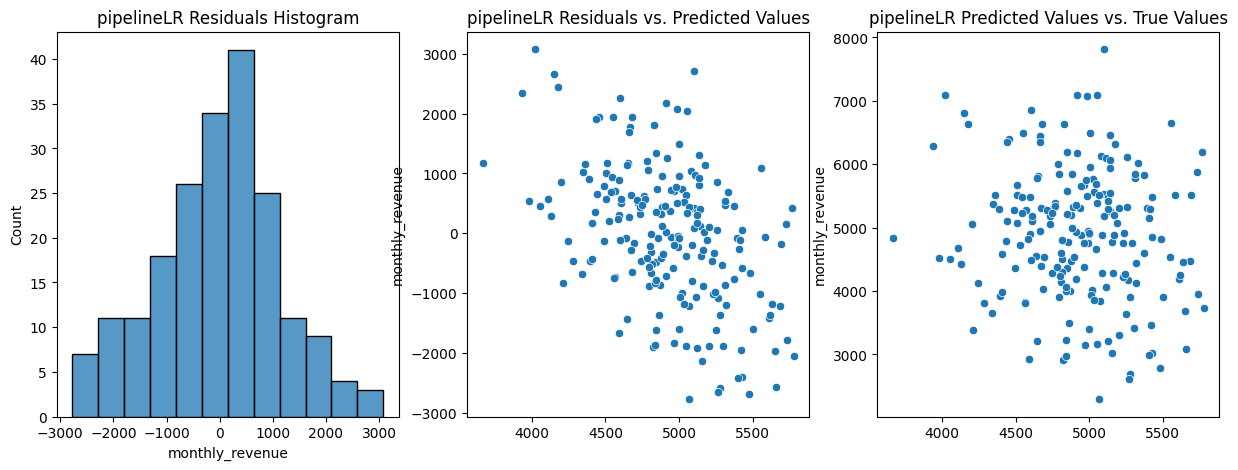

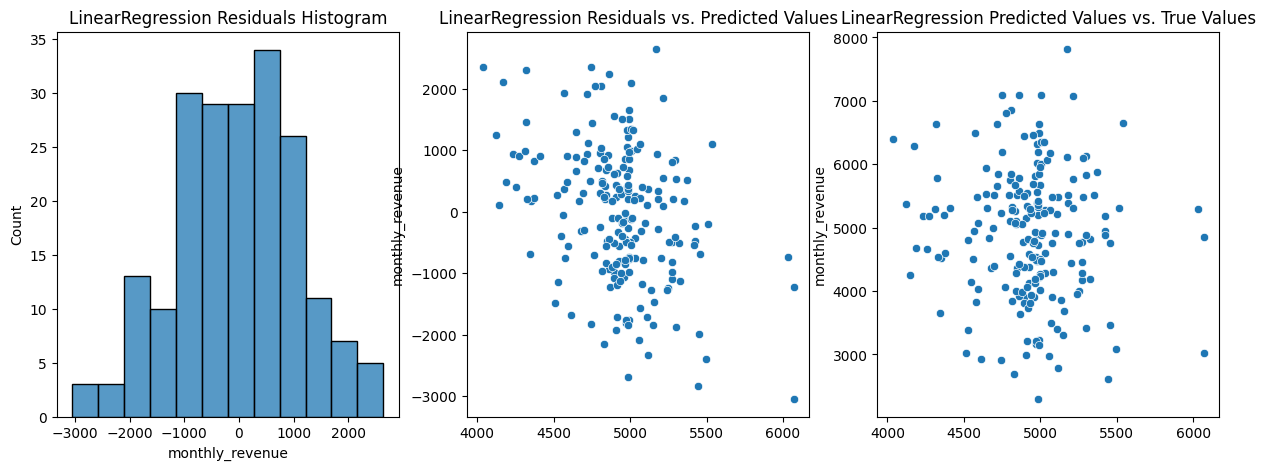

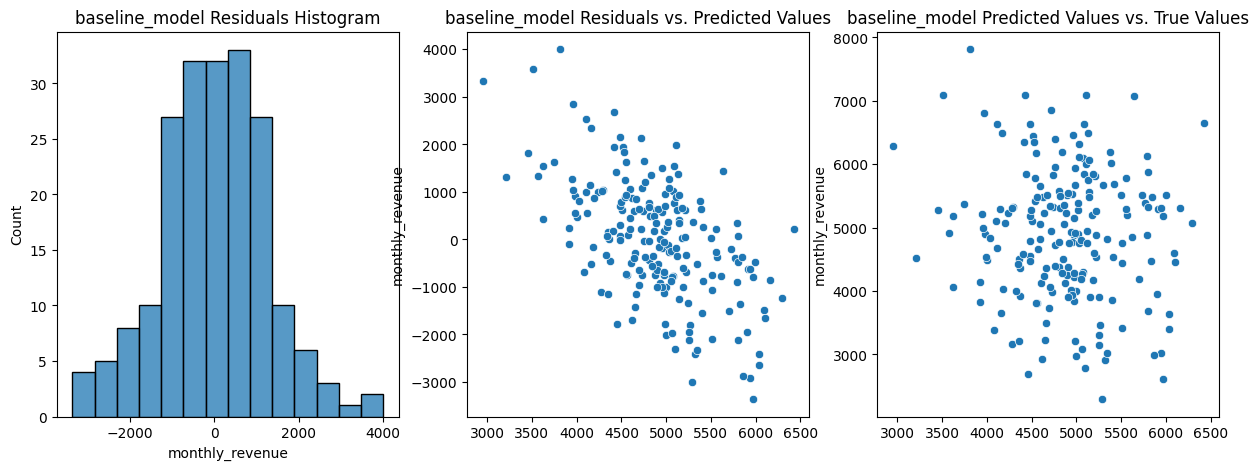

XGb_reg VIF:
   VIF Factor                    Feature
0    2.089618                   location
1    2.199525               cuisine_type
2    3.305638  average_customer_spending
3    1.227177                 promotions
4    2.441433                    reviews
Randomforest VIF:
   VIF Factor                    Feature
0    2.089618                   location
1    2.199525               cuisine_type
2    3.305638  average_customer_spending
3    1.227177                 promotions
4    2.441433                    reviews
pipelineLR VIF:
   VIF Factor                    Feature
0    2.089618                   location
1    2.199525               cuisine_type
2    3.305638  average_customer_spending
3    1.227177                 promotions
4    2.441433                    reviews
LinearRegression VIF:
   VIF Factor                    Feature
0    2.089618                   location
1    2.199525               cuisine_type
2    3.305638  average_customer_spending
3    1.227177                

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Adjusted R-squared and Predicted R-squared
model_names=['XGb_reg','Randomforest', 'pipelineLR', 'LinearRegression', 'baseline_model','LassoRegression','Decision Tree', 'RandomForestReg', 'Gradient Boosting', 'XGBoost']
mdls= [model, model_1, model_2, model_3, baseline_model, model_5, tree, rf, gb, xgb]
for model_name, modl in zip(model_names, mdls):
    y_pred = modl.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = len(X_test)
    p = len(X_test.columns)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    pred_r2 = 1 - (mean_squared_error(y_test, y_pred) / np.var(y_test))
    print(f'{model_name}: Adjusted R-squared = {adj_r2:.3f}, Predicted R-squared = {pred_r2:.3f}')

# Residual Analysis
for model_name, modl in zip(model_names, models):
    y_pred = modl.predict(X_test)
    residuals = y_test - y_pred
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.histplot(residuals, ax=axes[0])
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
    sns.scatterplot(x=y_pred, y=y_test, ax=axes[2])
    axes[0].set_title(f'{model_name} Residuals Histogram')
    axes[1].set_title(f'{model_name} Residuals vs. Predicted Values')
    axes[2].set_title(f'{model_name} Predicted Values vs. True Values')
    plt.show()

# Variance Inflation Factor (VIF)
for model_name, modl in zip(model_names, models):
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    print(f'{model_name} VIF:')
    print(vif)